In [8]:
#######################
#----- Librerias -----#
#######################
import pandas as pd
import plotly.graph_objects as go
import folium
from folium.plugins import HeatMap
import folium.plugins as plugins
import seaborn as sns
from scipy.stats import norm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

############################
#----- Carga de datos -----#
############################

ciudades = ['Barcelona', 'Euskadi', 'Girona', 'Madrid', 'Malaga', 'Mallorca', 'Menorca', 
            'Sevilla', 'Valencia']
tmp = []
for i in range(len(ciudades)):
    a = 'listings_'
    b = ciudades[i]
    c = '.csv'
    d = a+b+c
    res = pd.read_csv('dat/'+d, encoding="UTF-8", parse_dates = ['last_review'], dtype = {"price":"float"})
    res['ciudad']= b
    tmp.append(res)

usuarios =pd.DataFrame([])
for i in range(len(ciudades)):
    usuarios = usuarios.append(tmp[i])
usuarios.rename(columns={"id": "id_usuario", "name": "nombre", "host_id": "id_host", 
                         "host_name": "nombre_host","neighbourhood_group":"grupo", 
                         "neighbourhood": "barrio", "latitude": "latitud", 
                         "longitude": "longitud", "room_type": "tipo_habitacion",
                         "price": "precio", "minimum_nights": "noches_minimas",
                         "number_of_reviews": "numero_visitas","last_review":"ultima_visita",
                         "reviews_per_month":"visitas_mes",
                         "calculated_host_listings_count": "lista_host", 
                         "availability_365": "disponibilidad"}, inplace=True)

usuarios

,id_usuario,nombre,id_host,nombre_host,grupo,barrio,latitud,longitud,tipo_habitacion,precio,noches_minimas,numero_visitas,ultima_visita,visitas_mes,lista_host,disponibilidad,ciudad
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130.0,3,1,2015-10-10,0.02,31,251,Barcelona
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,60.0,1,16,2019-08-04,0.21,31,52,Barcelona
2,21605,Nice and sunny duble room,82522,Meritxell,Sant Martí,el Poblenou,41.40560,2.19821,Private room,33.0,2,125,2019-09-08,3.05,2,3,Barcelona
3,23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41203,2.22114,Entire home/apt,210.0,3,49,2019-09-10,0.47,2,326,Barcelona
4,25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,108310,Pedro,Gràcia,la Vila de Gràcia,41.40145,2.15645,Private room,45.0,1,254,2019-09-10,2.29,1,77,Barcelona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,39003184,apartamento en la playa con wifi,58803405,Carlos,POBLATS DEL SUD,EL PERELLONET,39.30533,-0.29295,Entire home/apt,50.0,2,0,NaT,NaN,2,174,Valencia
7229,39010933,Private double room Habitación doble privado,6499518,Berndt,POBLATS MARITIMS,NATZARET,39.44841,-0.33514,Private room,18.0,2,0,NaT,NaN,3,176,Valencia
7230,39020487,Cozy Room near Ciudad de las Artes & the beach,60525307,Ines,CAMINS AL GRAU,AIORA,39.46190,-0.33881,Private room,20.0,3,0,NaT,NaN,2,34,Valencia
7231,39021228,Habitación para 2 personas en el barrio del ca...,80863744,Carlos,CIUTAT VELLA,EL PILAR,39.47468,-0.38275,Private room,17.0,2,0,NaT,NaN,1,15,Valencia


### Comparativo ciudades:

Para tener una mejor prespectiva del comportamiento de la disponibilidad, realizamos un análisis por ciudad utilizando como medida central la mediana debido a su distribución.

In [9]:
##############################################
#----- Crear variable de disponibilidad -----#
##############################################

def disponible (x):
    if x <= 31:
        return 'disponibilidad baja (<= 31)'
    elif x <= 93:
        return 'disponibilidad media baja (<= 93)'
    elif x <= 186:
        return 'disponibilidad media alta (<= 186)'
    elif x <= 279:
        return 'disponibilidad alta (<= 279)'
    else:
        return 'disponibilidad muy alta (> 279)'
    
usuarios['tipo_disponibilidad'] = usuarios.apply(lambda x: disponible(x.disponibilidad) , axis=1)

usuarios_disponibilidad = usuarios[usuarios.ciudad.isin(['Barcelona', 'Malaga', 'Mallorca',
                                                        'Madrid'])]
usuarios_disponibilidad
usuarios_tophabitacion = usuarios.pivot_table(index=['ciudad'], 
                                columns='tipo_disponibilidad',
                                values='disponibilidad', aggfunc='median', dropna=True)
usuarios_tophabitacion_1 = usuarios_tophabitacion.reset_index()
usuarios_tophabitacion_1

tipo_disponibilidad,ciudad,disponibilidad alta (<= 279),disponibilidad baja (<= 31),disponibilidad media alta (<= 186),disponibilidad media baja (<= 93),disponibilidad muy alta (> 279)
0,Barcelona,248,0,144,66,329
1,Euskadi,244,0,152,76,342
2,Girona,251,0,161,80,358
3,Madrid,247,0,140,68,334
4,Malaga,246,0,148,74,336
5,Mallorca,226,2,157,70,346
6,Menorca,230,7,149,77,358
7,Sevilla,242,0,140,65,321
8,Valencia,242,0,144,67,335


In [10]:
#############################################
#----- ciudades vs tipo disponibilidad -----#
#############################################

fig = go.Figure(data=[
    go.Bar(name='baja', x = usuarios_tophabitacion_1.ciudad, 
           y = usuarios_tophabitacion_1['disponibilidad baja (<= 31)']),
    go.Bar(name='media baja', x = usuarios_tophabitacion_1.ciudad,
           y = usuarios_tophabitacion_1['disponibilidad media baja (<= 93)']),
    go.Bar(name='media alta', x = usuarios_tophabitacion_1.ciudad, y = usuarios_tophabitacion_1['disponibilidad media alta (<= 186)']),
    go.Bar(name='alta', x = usuarios_tophabitacion_1.ciudad,
           y = usuarios_tophabitacion_1['disponibilidad alta (<= 279)']),
    go.Bar(name='muy alta', x = usuarios_tophabitacion_1.ciudad, 
           y = usuarios_tophabitacion_1['disponibilidad muy alta (> 279)'])
])
fig.update_layout(barmode='stack', title='Disponibilidad Mediana',
                 xaxis_tickfont_size=14,
                 yaxis=dict(title='Disponibilidad',titlefont_size=16,
                            tickfont_size=14))
fig.show()

### Comparativo Mallorca, Málaga, Madrid y Barcelona:

Para poder entender un poco la distribución de los datos, realizamos una comparación entre 3 ciudades semejantes (Mallorca, Málaga y Barcelona) con una diferente; se utilizó como medida central la mediana (la mediana fue elegida debido a su distribución de datos).
En la gráfica inferior realizamos un análisis de la dispersión de su disponibilidad.

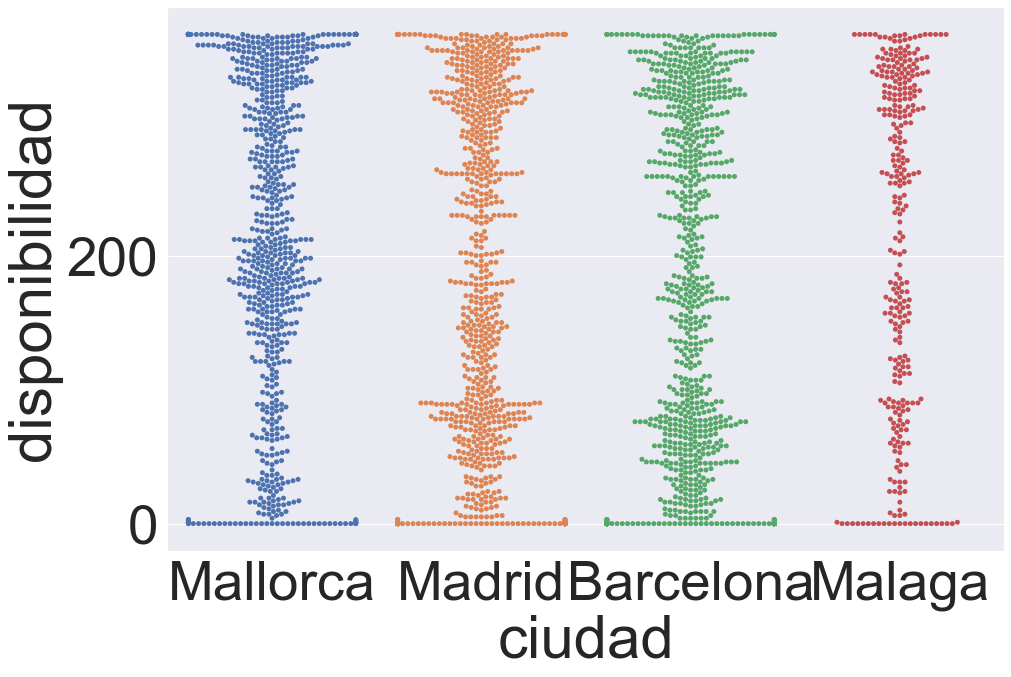

In [24]:
usuarios_dis = usuarios[usuarios.ciudad.isin(['Barcelona'])]
usuarios_1 = usuarios_disponibilidad.sample(3000, random_state=1234).copy()

fig, ax = plt.subplots(figsize = (15,10))
out = sns.swarmplot(x='ciudad', y='disponibilidad', data=usuarios_1)
sns.set(font_scale=5)

En este gráfico podemos ver que según las ciudades que se encuentran en las costas existe más Airb&b, y las ciudades tiene más concentrado el número de alquiles mientras más se acercan a las zonas turísticas.

In [17]:
españa = [40.406093, -3.693450]
españa
m = folium.Map(location=españa, zoom_start=6, tiles='cartodbpositron')
heatmap = HeatMap(data=usuarios[["latitud", "longitud"]], radius=15).add_to(m)
m

### Conclusiones:

* Tanto como Mallorca, Barcelona, Madrid y Málaga tienen comportamientos similares, sus datos se distribuyen la gran mayoría entre disponibilidad baja y muy alta. 
*si comparamos Barcelona y Madrid, lo más interesante es que Barcelona cuenta con más datos que Madrid, podemos suponer que esto se debe a que Madrid se encuentra más regulada y que el flujo de turismo es menor. 

In [18]:
# Calcular la cantidad de Barrios
grupos = usuarios.groupby('grupo').id_usuario.count()
cantidad_grupos = len(grupos) 

# Promedio por tipo de habitacion de todas las cuidades.
Mediaciudades = 100 * usuarios['tipo_habitacion'].value_counts() / len(usuarios['tipo_habitacion'])

#Conteo de tipo de habitaciones por grupo
usuarios_tophabit = usuarios.pivot_table(index=['tipo_habitacion', "ciudad"],
                                values='disponibilidad', aggfunc='count')
usuarios_tophabit_1 = usuarios_tophabit.reset_index()

# Conteo total de los 4 tipos de habitaciones juntos en uno solo numero por grupo.
tipo_habitacion = usuarios_tophabit_1.groupby(["ciudad"]).sum()

# Union de las dos tablas anteriores
tipo_habitacion_1 = usuarios_tophabit_1.merge(tipo_habitacion, on="ciudad")

# Creo la columna "Porecntaje".
tipo_habitacion_1["Porcentaje"] = (tipo_habitacion_1["disponibilidad_x"] / tipo_habitacion_1["disponibilidad_y"]) * 100

# Elimino dos columnas que solo me sirvieron para poder calcular el porcentaje.
tipo_habitacion_2 = tipo_habitacion_1.drop(['disponibilidad_x', "disponibilidad_y"], axis=1)

tipo_habitacion_3 = tipo_habitacion_2.pivot_table(index=["ciudad"],
                          columns="tipo_habitacion",
                          values="Porcentaje")
tipo_habitacion_4 = tipo_habitacion_3.reset_index()
tipo_habitacion_4

tipo_habitacion,ciudad,Entire home/apt,Hotel room,Private room,Shared room
0,Barcelona,44.417761,3.803176,51.009606,0.769457
1,Euskadi,64.546305,2.188962,31.936389,1.328344
2,Girona,92.751934,1.345767,5.844018,0.058281
3,Madrid,60.387772,2.289197,36.008063,1.314969
4,Malaga,83.837382,1.289043,14.658734,0.214841
5,Mallorca,89.324238,1.755000,8.809982,0.110781
6,Menorca,90.332214,1.530422,8.100037,0.037327
7,Sevilla,79.726289,2.259707,17.711649,0.302355
8,Valencia,67.634453,1.216646,30.582054,0.566846


En esta tabla se refleja el promedio de **tipo de habitaciones** para cada ciudad.

In [19]:
fig = go.Figure(data=[
    go.Bar(name="Entire home/apt", x=tipo_habitacion_4.ciudad, y=tipo_habitacion_4["Entire home/apt"]),
    go.Bar(name="Hotel room", x=tipo_habitacion_4.ciudad, y=tipo_habitacion_4["Hotel room"]),
    go.Bar(name="Private room", x=tipo_habitacion_4.ciudad, y=tipo_habitacion_4["Private room"]),
    go.Bar(name="Shared room", x=tipo_habitacion_4.ciudad, y=tipo_habitacion_4["Shared room"])
    
])
fig
fig.update_layout(
    barmode='stack',
    title="Porcentaje del tipo de Hospedaje por Ciudad",
      xaxis_title="Ciudades",
    yaxis_title="Porcentaje acumulado",
    font=dict(
        family="Times New Roman",
        size=17
    )
)
fig.show()

**Conclusion**: 

Como podemos apreciar en este gráfico, la cuidad que mas **habitaciones privadas** proporcionalmente tiene es **Barcelona**, y a su vez, la que menos **departamentos enteros** posee. A su vez, la ciudad de **Girona** es la que proporcionalmente más **departamentos enteros** tienen la que menos **habitaciones privadas** dispone. También se puede observar la gran escases de **habitaciones de hotel** y más escasas aun las **habitaciones compartidas**.